In [1]:
import numpy as np
import matplotlib.pyplot as plt
from comparing_epsilons import Bandit
from optimistic_initial_values import run_experiment as run_experiment_oiv
from ucb1 import run_experiment as run_experiment_ucb

In [2]:
class BayesianBandit:
  def __init__(self, m):
    self.m = m
    # parameters for mu - prior is N(0,1)
    self.m0 = 0
    self.lambda0 = 1
    self.sum_x = 0 # for convenience
    self.tau = 1

  def pull(self):
    return np.random.randn() + self.m

  def sample(self):
    return np.random.randn() / np.sqrt(self.lambda0) + self.m0

  def update(self, x):
    # assume tau is 1
    self.lambda0 += 1
    self.sum_x += x
    self.m0 = self.tau*self.sum_x / self.lambda0

In [4]:
def run_experiment_decaying_epsilon(m1, m2, m3, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < 1.0/(i+1):
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

In [5]:
def run_experiment(m1, m2, m3, N):
  bandits = [BayesianBandit(m1), BayesianBandit(m2), BayesianBandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # optimistic initial values
    j = np.argmax([b.sample() for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  return cumulative_average

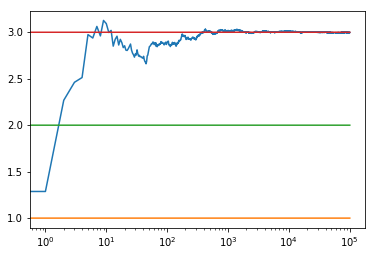

1.3708243673546567
2.103175962601382
2.997402354696973


In [6]:
eps = run_experiment_decaying_epsilon(1.0, 2.0, 3.0, 100000)

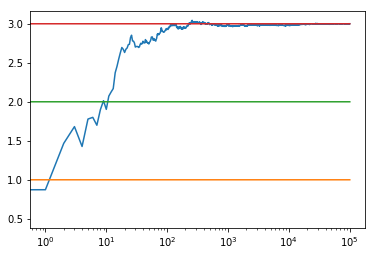

2.807815898799945
2.940195083795954
3.000942206708536


In [7]:
oiv = run_experiment_oiv(1.0, 2.0, 3.0, 100000)

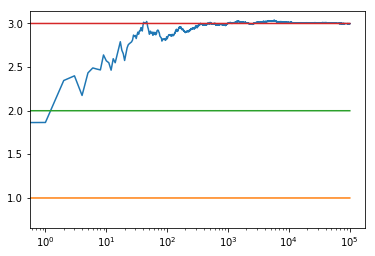

0.664509532993594
1.5570782142343012
2.9981243788973746


In [8]:
ucb = run_experiment_ucb(1.0, 2.0, 3.0, 100000)

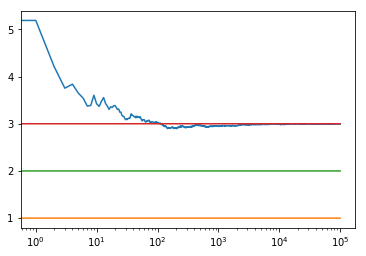

In [9]:
bayes = run_experiment(1.0, 2.0, 3.0, 100000)

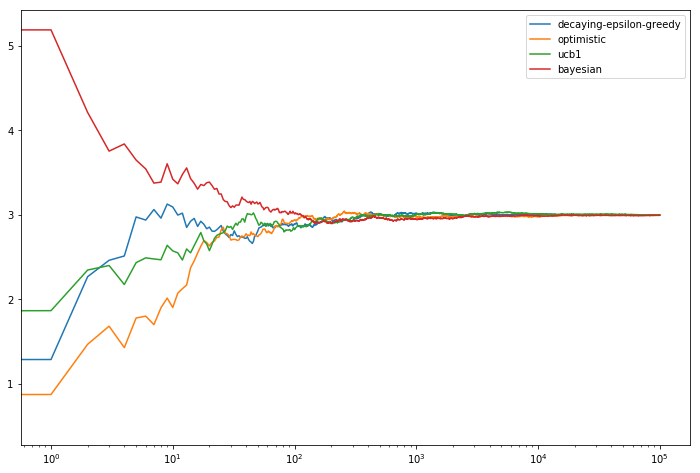

In [10]:
  # log scale plot
  plt.figure(figsize=(12,8))
  plt.plot(eps, label='decaying-epsilon-greedy')
  plt.plot(oiv, label='optimistic')
  plt.plot(ucb, label='ucb1')
  plt.plot(bayes, label='bayesian')
  plt.legend()
  plt.xscale('log')
  plt.show()

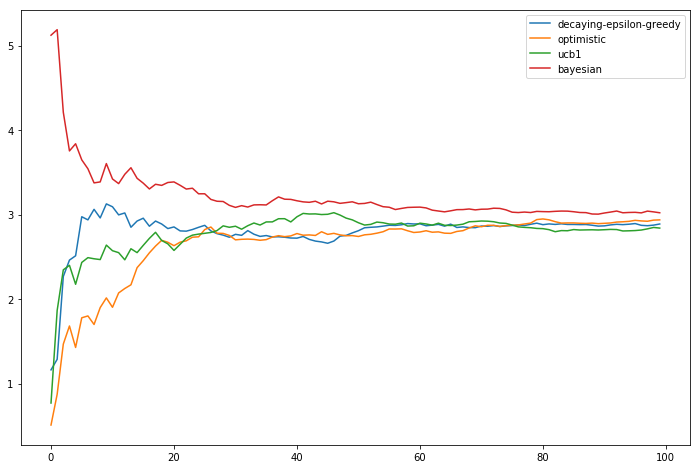

In [12]:
  # linear plot
  plt.figure(figsize=(12,8))
  plt.plot(eps[:100], label='decaying-epsilon-greedy')
  plt.plot(oiv[:100], label='optimistic')
  plt.plot(ucb[:100], label='ucb1')
  plt.plot(bayes[:100], label='bayesian')
  plt.legend()
  plt.show()